# 전국 신규 민간 아파트 분양가격 동향 


2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.




##  다루는 내용

- 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기

- 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기

- 데이터의 형식에 따른 다양한 시각화 방법 이해하기




## 실습

- 공공데이터 다운로드 후 주피터 노트북으로 로드하기
- 판다스를 통해 데이터를 요약하고 분석하기
- 데이터 전처리와 병합하기
 - 수치형 데이터와 범주형 데이터 다루기
- 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기





## 데이터셋

- 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)

- 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공


###  주택도시보증공사_전국 평균 분양가격(2019년 12월)

- 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
- 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러온다
import pandas as pd

## 데이터 로드

### 최근 파일 로드

공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러온다. 이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않는다. 보통 엑셀로 저장된 한글의 인코딩은 cp949  혹은 euc-kr로 되어 있다. df_last라는 변수에 최근 분양가 파일을 다운로드 받아 로드한다.

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력

In [2]:
# 최근 분양가 파일을 로드해서 df_last라는 변수에 담음
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding = "cp949")
df_last.shape  # 행, 열

(4335, 5)

In [3]:
# head로 파일을 미리보기

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
# tail 로도 미리보기 가능

df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


### 2015년부터 최근까지의 데이터 로드

전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러온다. df_first라는 변수에 담고 shape로 행과 열의 갯수를 출력

In [5]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력

%ls data

 C 드라이브의 볼륨: Windows-SSD
 볼륨 일련 번호: 306D-187A

 C:\Users\rlatj\Open Data Projects\CH1. 전국 신규 민간 아파트 분양가 분석(리뉴얼)\data 디렉터리

2021-01-07  오전 01:58    <DIR>          .
2021-01-07  오전 01:58    <DIR>          ..
2021-01-07  오전 01:49             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2021-01-07  오전 01:49           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
               2개 파일             164,673 바이트
               2개 디렉터리  86,471,577,600 바이트 남음


In [6]:
# df_first
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding = "cp949")
df_first.shape

(17, 22)

In [7]:
# df_first 변수에 담긴 DataFrame을 head로 미리보기
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
# df_first 변수에 담긴 DataFrame을 tail로 미리보기
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null int64
월          4335 non-null int64
분양가격(㎡)    4058 non-null object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


object = 문자 형태의 데이터로 되어 있다.

### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는 지를 확인할 수 있다. 결측치는 True로 표시되는데, True == 1이기 때문에 True의 수를 다 더하면 결측치의 수가 됩니다.

In [10]:
True == 1

True

In [11]:
False == 0

True

In [12]:
True + True + False

2

True의 수를 다 더하면 총 결측치의 수가 나옴

In [13]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [14]:
# isnull을 통해 결측치를 구합니다
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [15]:
# isna를 통해 결측치를 구합니다.
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

### 데이터 타입 변경

분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric을 통해 데이터의 타입을 변경합니다

In [16]:
type(pd.np.nan)

float

In [17]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["분양가격"]

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격, Length: 4335, dtype: float64

형변환한 컬럼을 새로운 컬럼에 담아주지 않으면 변동사항이 저장이 안된다.

### 평당분양가격 구하기

공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다. 분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가 (df_first에 있는 자료와 단위를 동일화)

In [18]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


### 분양가격 요약하기

In [19]:
# info를 통해 분양가격 확인
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null int64
월          4335 non-null int64
분양가격(㎡)    4058 non-null object
분양가격       3957 non-null float64
평당분양가격     3957 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [20]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼 요약

df_last["분양가격(㎡)"].describe()

# unique = 중복되지 않은 값 (카테고리, 스트링 데이터 요약할 때)
# top = 가장 빈번하게 등장하는 문자
# freq = 가장 빈번하게 등장하고 있는 문자가 몇 번 등장하는 지

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [21]:
# 수치데이터로 변경된 분양가격 컬럼 요약

In [22]:
df_last["분양가격"].describe()

# 수치데이터를 볼 때 중앙값과 평균값의 차이가 얼마나 나는지
# - 중앙값은 2874.00- 인데 평균값이 3238.1286-- 으로 큰 이유는 max값이 크기 때문에 영향을 받음


count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

object와 float 형태의 describe의 count 결과가 다른 이유
- object는 결측치도 데이터로 보고, float형태는 결측치를 제외하고 데이터를 count함

### 규모구분을 전용면적 컬럼으로 변경

규모구분 컬럼은 전용면적에 대한 내용이 포함됨. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들고, 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들기

문자들도 메모리를 차지하고 있기 때문에 메모리 사용량 제거에 도움이 된다.

str의 replace 기능을 이용

In [23]:
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [24]:
df_last["규모구분"]

0                      전체
1              전용면적 60㎡이하
2        전용면적 60㎡초과 85㎡이하
3       전용면적 85㎡초과 102㎡이하
4             전용면적 102㎡초과
              ...        
4330                   전체
4331           전용면적 60㎡이하
4332     전용면적 60㎡초과 85㎡이하
4333    전용면적 85㎡초과 102㎡이하
4334          전용면적 102㎡초과
Name: 규모구분, Length: 4335, dtype: object

In [25]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


In [26]:
# replace는 문자열이 완벽하게 일치해야 적용이 되므로 판다에 있는 str.replace기능을 사용

df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","").str.strip() # 앞 뒤에 있는 공백을 제거 : strip
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

### 필요없는 컬럼 제거하기

- drop을 통해 전처리 해준 컬럼을 제거.
pandas의 데이터프레임과 관련된 메소드에 axis 옵션이 필요할 때가 있는데, 행과 열중 어떤 기준으로 처리할 것인지 의미함. 
- 기본값은 0이며, 행을 기준으로 처리함을 의미

In [27]:
# drop 사용시 axis에 유의
# axis 0 : 행 / 1 : 열
df_last = df_last.drop(['규모구분', "분양가격(㎡)"], axis=1)

In [28]:
# 제거 결과 확인
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [29]:
# 컬럼 제거를 통해 메모리 사용량이 줄었는지 확인
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
지역명       4335 non-null object
연도        4335 non-null int64
월         4335 non-null int64
분양가격      3957 non-null float64
평당분양가격    3957 non-null float64
전용면적      4335 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


## groupby로 데이터 집계하기
- Series 형태를 반환

groupby를 통해 데이터를 그룹화해서 연산해보기

In [30]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 한다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()

# 지역별 평당분양가격 평균
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [31]:
# 전용면적으로 평당분양가격의 평균 구하기
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [32]:
# 지역명, 전용면적으로 평당분양가격의 평균 구하기

# unstack() : 끝에 있는 인덱스 컬럼이 컬럼 값으로 오게 됨.
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()


지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [33]:
# 연도, 지역명으로 평당분양가격의 평균 구하기

g = df_last.groupby(["연도","지역명"])["평당분양가격"].mean()
g

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

## pivot table로 데이터 집계하기
- groupby로 했던 작업을 pivot table로
- DataFrame 형태로 반환
- pivot은 연산을 하지 않고 데이터의 형태만 바꿈

In [34]:
# aggfunc 기본값 : mean
pd.pivot_table(df_last, index=['지역명'], values = ["평당분양가격"], aggfunc="mean")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [35]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()

In [36]:
pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


##### 인덱스가 2개인 경우 groupby랑 pivot table 비교

In [37]:
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [38]:
df_last.pivot_table(index="전용면적",columns="지역명", values= "평당분양가격")

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡~85㎡,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡~102㎡,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [39]:
# 연도, 지역명으로 평당분양가격의 평균 구하기
# g = df_last.groupby(["연도","지역명"])["평당분양가격"].mean()
p = pd.pivot_table(df_last, index=["연도","지역명"] ,values="평당분양가격")

# p로 하면 데이터가 전부 출력이 안된다
# 행 기준으로 출력하는 loc를 사용하여 특정 연도별, 지역명 기준으로 가격확인
p.loc[2016]

,평당분양가격
지역명,
강원,7162.903846
경기,11684.970000
경남,8496.730000
경북,7753.405000
광주,9190.683333
대구,10282.030000
대전,8910.733333
부산,10743.535000
서울,21753.435000


## 최근 데이터 시각화 하기

### 데이터 시각화를 위한 폰트설정

한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 import

In [40]:
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")

### Pandas로 시각화 하기 - 선그래프와 막대그래프

- pandas의 plot을 사용하면 다양한 그래프 그리기 가능.
- seaborn을 사용했을 때보다 pandas 시각화의 장점
    - 속도가 빠름 ( 미리 계산을 하고 그리기 때문)

C:\Users\rlatj\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='지역명'>

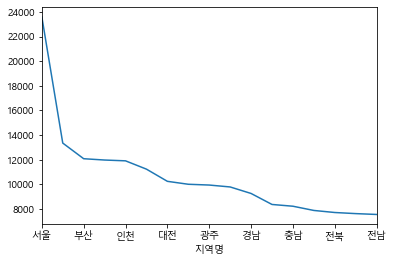

In [41]:
# 지역명으로 분양가격의 평균을 구하고 선 그래프로 시각화


g =df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
# sort_values - 그래프 오름차순 / sort_values(ascending = False) - 내림차순

g.plot()


<AxesSubplot:xlabel='지역명'>

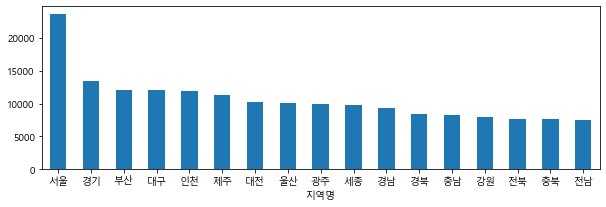

In [42]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화

g.plot.bar(rot = 0, figsize = (10,3)) 
# rot = 0 글씨를 올바로 / figsize = 넓게 그려보기 

전용면적별 분양가격의 평균값을 구하고 그래프로 그려보기

In [43]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화

<AxesSubplot:xlabel='전용면적'>

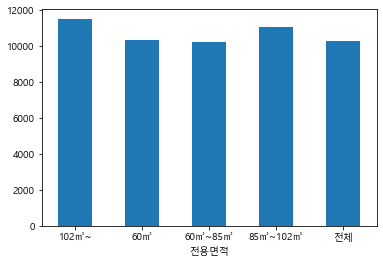

In [44]:
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar(rot = 0)

<AxesSubplot:xlabel='연도'>

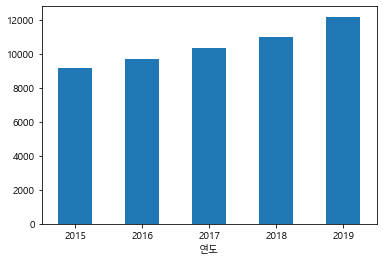

In [45]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화
df_last.groupby(["연도"])["평당분양가격"].mean().plot.bar(rot = 0)

### 박스 플롯 
- 가공하지 않은 자료 그대로를 그리는 게 아니라, 자료보퉈 얻어낸 통계량인 5가지 요약 수치(기술통계학에서 자료의 정보를 알려주는 수치)

    1. 최솟값
    2. 제 1사분위수
    3. 제 2사분위수 = 중앙값
    4. 제 3사분위수
    5. 최댓값

<AxesSubplot:>

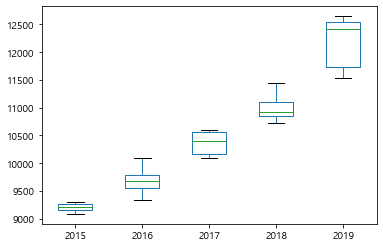

In [46]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

<AxesSubplot:>

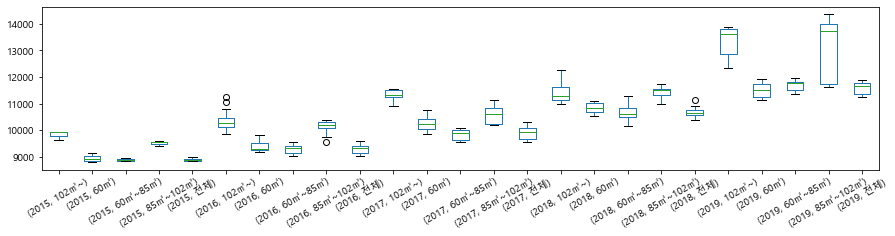

In [47]:
p =df_last.pivot_table(index="월", columns=["연도","전용면적"] ,values="평당분양가격")
p.plot.box(figsize = (15,3), rot = 30)

<AxesSubplot:xlabel='연도'>

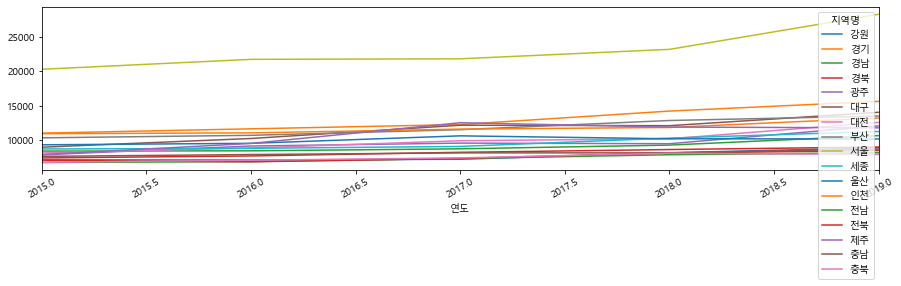

In [48]:
p =df_last.pivot_table(index="연도", columns="지역명" ,values="평당분양가격")

p.plot(figsize = (15,3), rot = 30)

### Seaborn으로 시각화 해보기

- 통계적인 연산을 바로 해주는 장점
- matplotlib 기반으로 만들어짐
- 기본 연산 : 평균

In [49]:
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

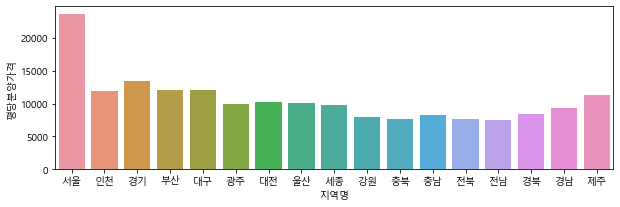

In [50]:
# barplot으로 지역별 평당분양가격

plt.figure(figsize=(10,3))

# 검은 점 : confidence intervals , 신뢰구간 / 95, "sd", None etc
# ci - 추정해서 그리기때문에 속도가 좀 느려짐


sns.barplot(data = df_last, x="지역명", y="평당분양가격", ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

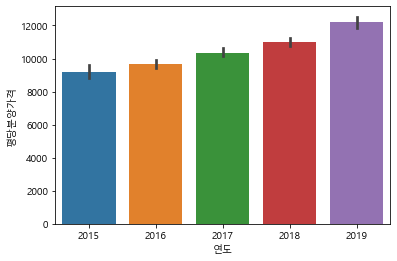

In [51]:
# barplot으로 연도별 평당분양가격
sns.barplot(data=df_last, x="연도", y="평당분양가격")

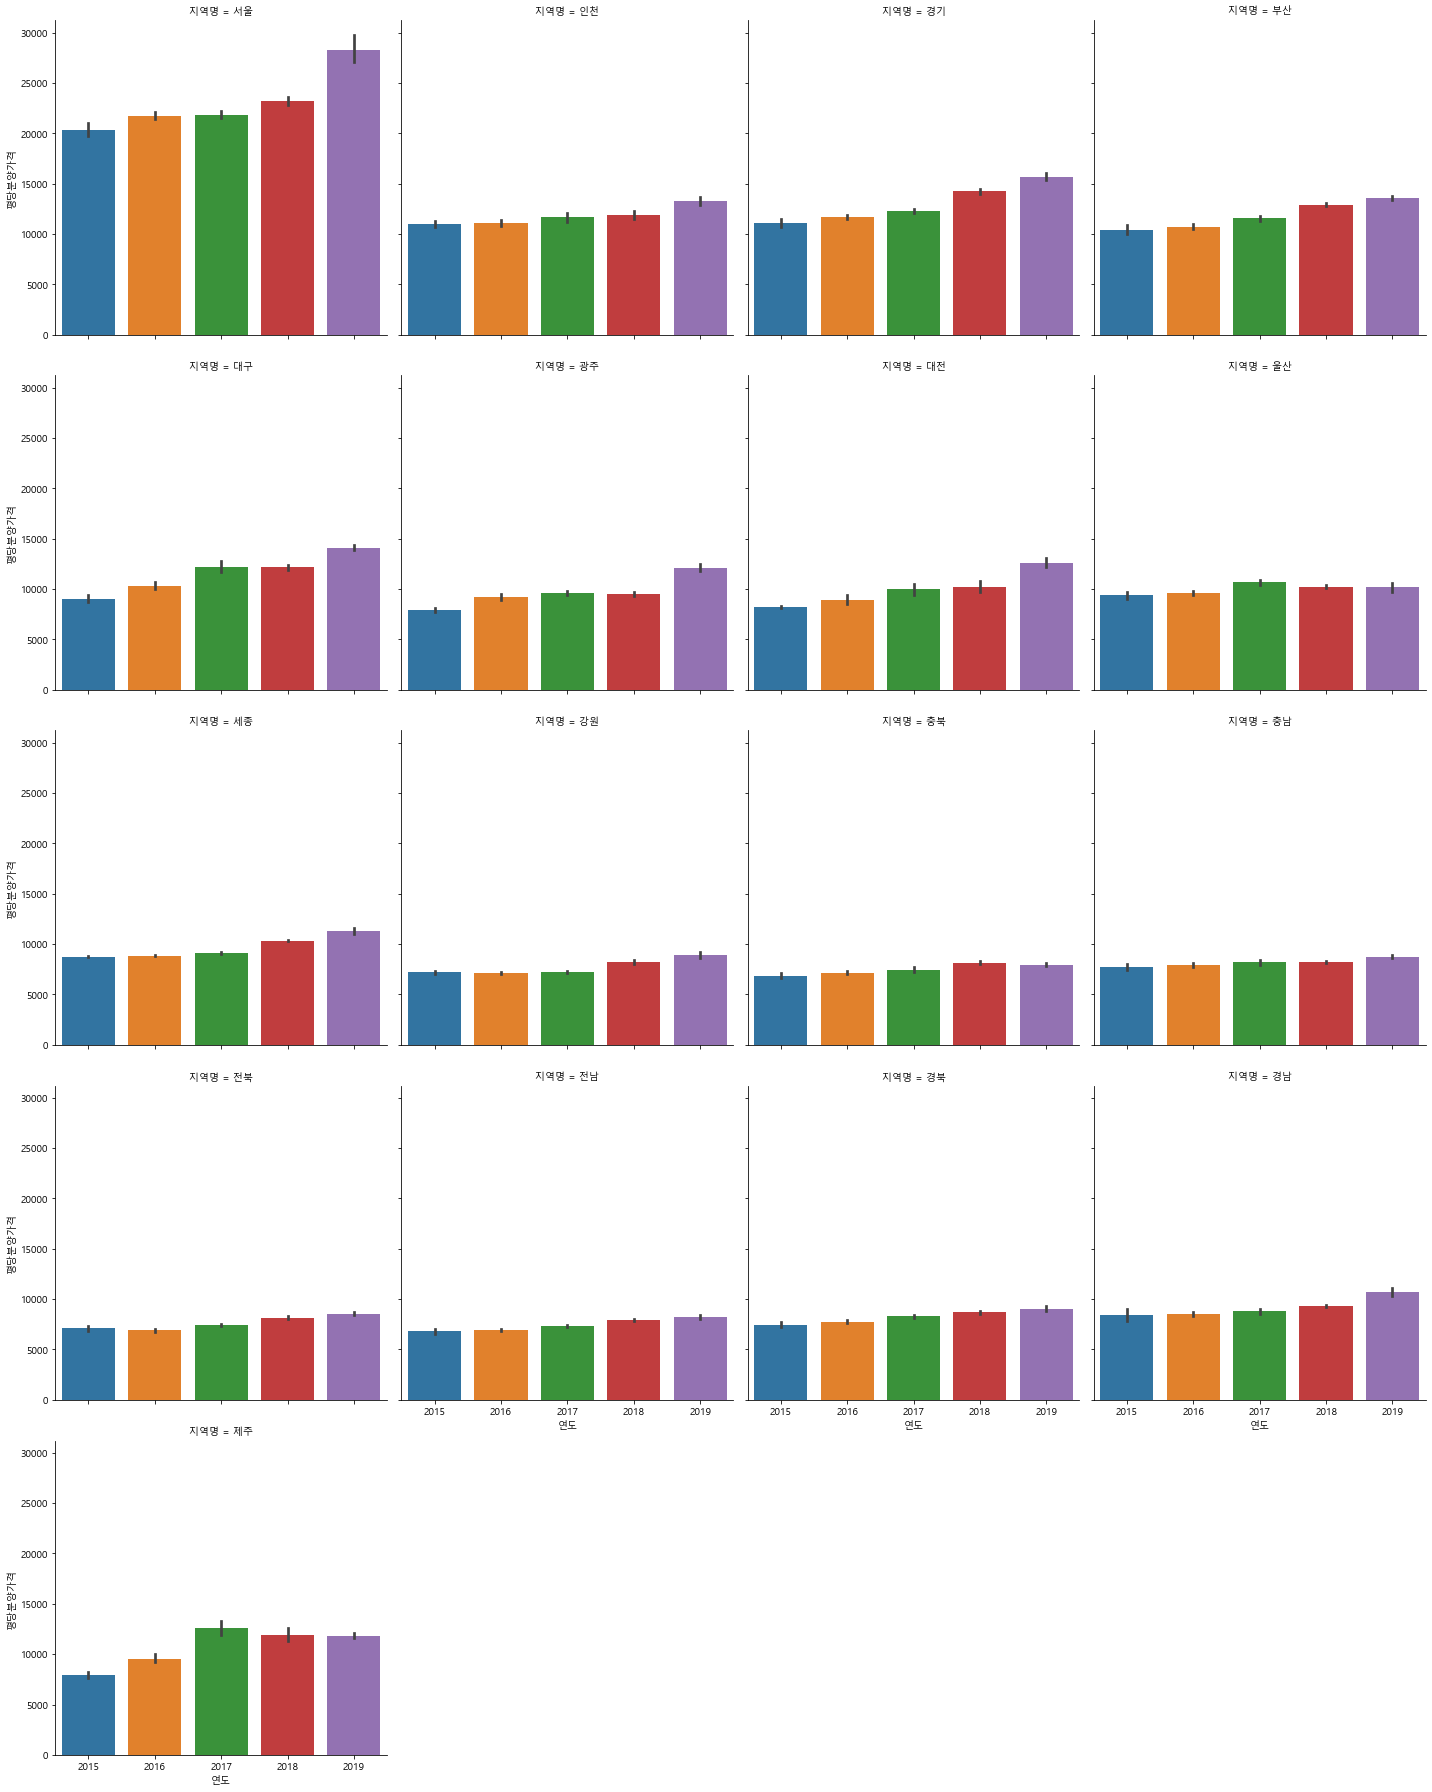

In [52]:
# 막대그래프를 서브플롯으로 그리기 : catplot
sns.catplot(data=df_last, x="연도", y="평당분양가격",
           kind="bar", col="지역명",col_wrap=4)

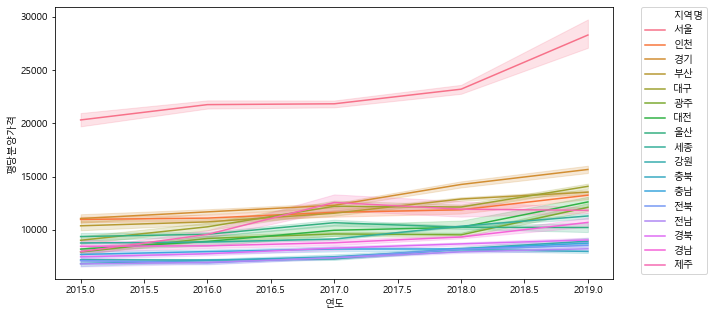

In [53]:
# lineplot으로 연도별 평당분양가격
# lineplot =  연속형 데이터, pointplot = 범주형 데이터
# hue 옵션을 통해 지역별로 다르게 표시
# hue = 색상을 의미, 각 데이터들을 다른 색상으로 표시하겠다.

plt.figure(figsize = (10, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")

# 레전드를 plot 밖에 위치시키기
# 1.05 = 그래프랑 얼마나 떨어져있을지
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

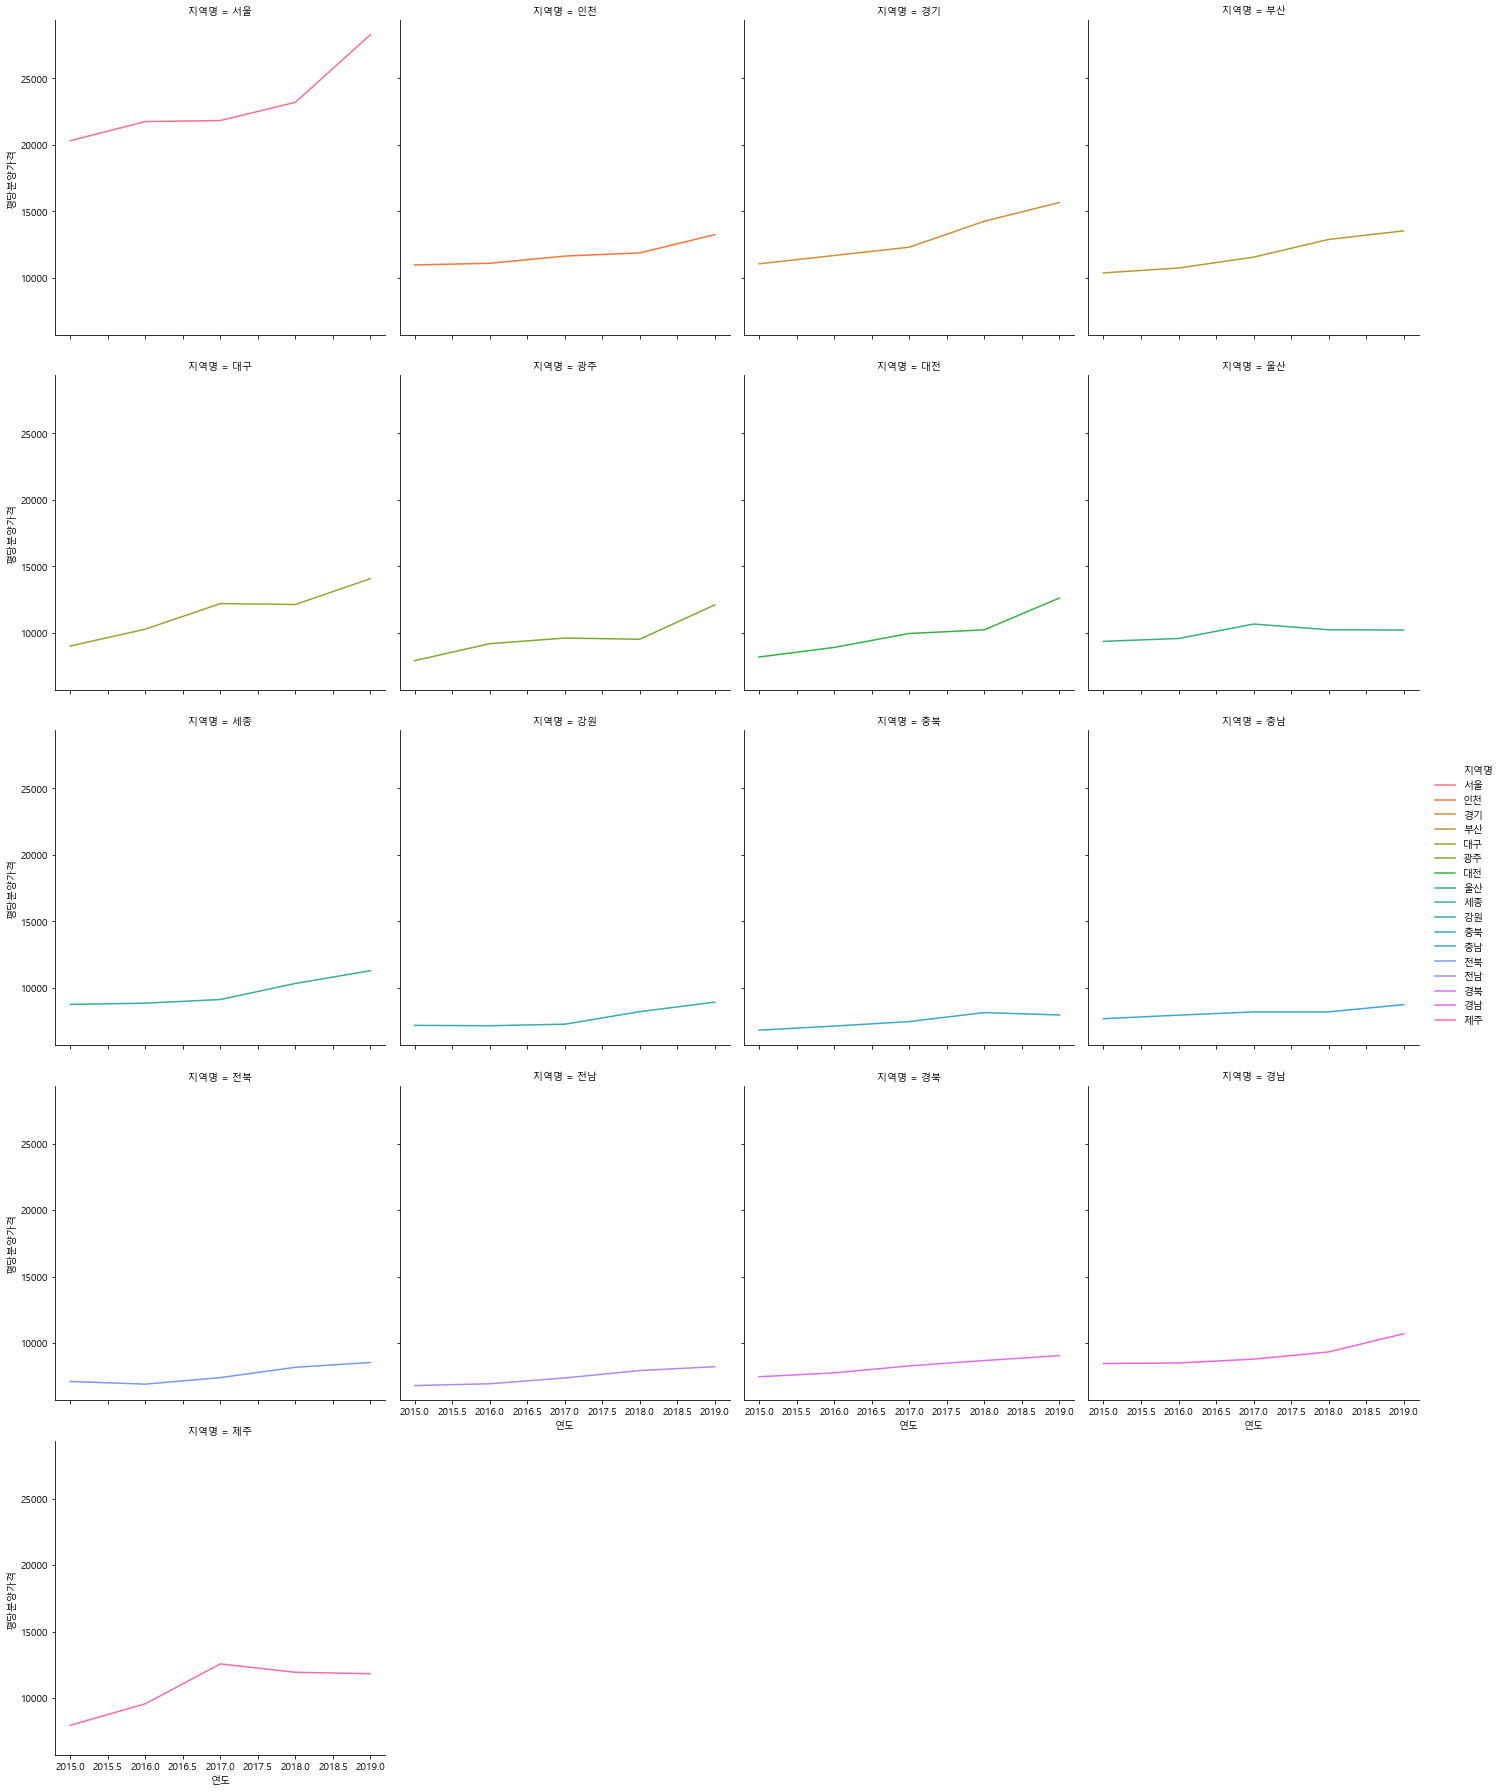

In [54]:
# lineplot을 subplot으로 바꿔서 그리기

# col_wrap = 한 줄에 몇 개씩 plot을 그릴 것인지
sns.relplot(data=df_last, x="연도", y="평당분양가격", 
            kind ="line", hue = "지역명",
            col="지역명", col_wrap=4, ci=None)

### boxplot과 violinplot


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

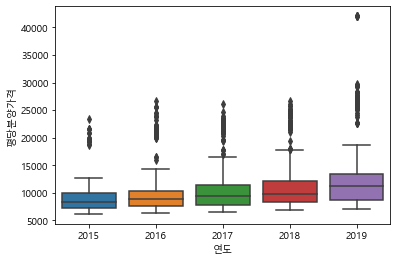

In [55]:
# boxplot으로 연도별 평당분양가격
# 사분위수범위 (IQR, Interquartile range, Q3 - Q1)
# 이상치 : Q3 +1.5*IQR보다 크고, Q1-1.5*IQR 보다 작은 값

sns.boxplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

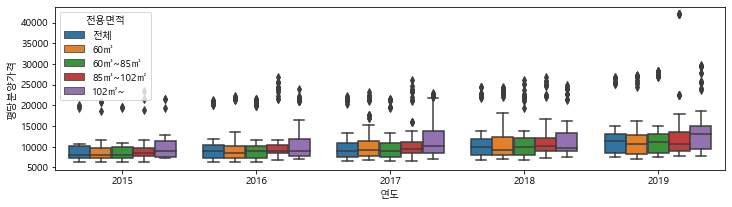

In [56]:
# hue옵션을 주어 전용면적별로 다르게 표시
plt.figure(figsize=(12,3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

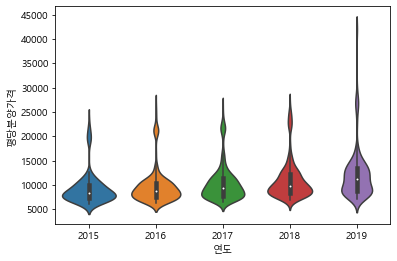

In [57]:
# violinplot으로 연도별 평당분양가격 
# boxplot의 단점을 보완 : 
# 1. box안에 있는 데이터들의 분포도 파악 가능
# 2. boxplot은 box안의 데이터들의 분포가 변하더라도 box가 변하지 않음

sns.violinplot(data=df_last, x="연도", y="평당분양가격")


### lmplot과 swarmplot

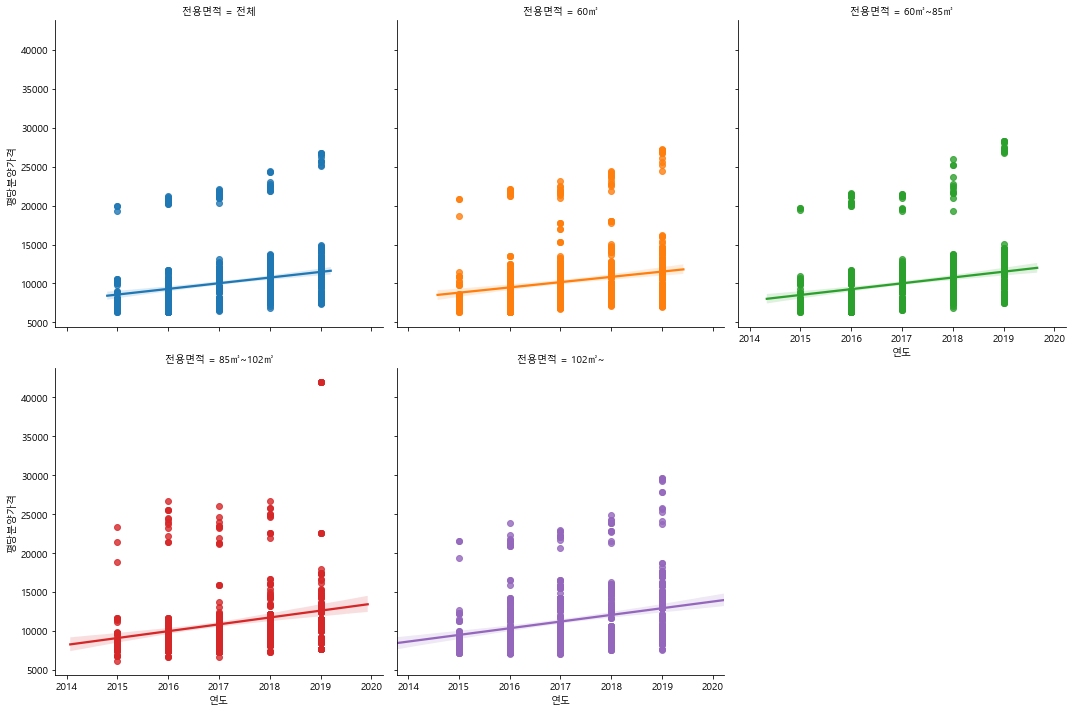

In [58]:
# lmplot으로 연도별 평당분양가격
# hue 옵션으로 전용면적을 표현하기

# regplot : scatterplot에 회귀선을 그린 것
# lmplot : regplot에서 hue값을 사용하고자 할 때
# lmplot은 x축, y축 둘 다 수치형 데이터일 때 그리는 게 적합
sns.lmplot(data=df_last, x="연도",y="평당분양가격"
           , hue="전용면적", col="전용면적", col_wrap=3)

C:\Users\rlatj\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\rlatj\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

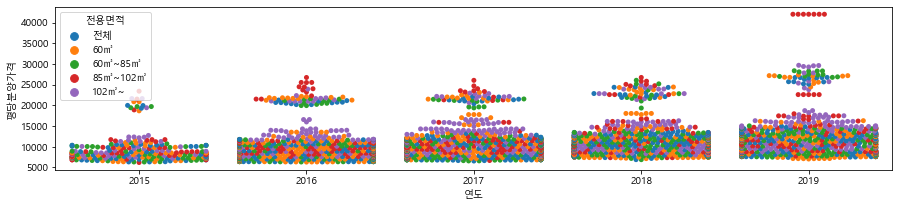

In [59]:
# swarmplot으로 연도별 평당분양가격
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합
# lmplot의 단점을 보완해서 옆으로 번지게 찍어줌 (분포 파악 용이)

plt.figure(figsize=(15,3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

### 이상치 보기

In [60]:
# 평당분양가격의 최대값을 구해서 max_price라는 변수에 담음

df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [61]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [62]:
# 서울에 평당분양가격이 월등히 높은 데이터 존재.
df_last[df_last["평당분양가격"] == max_price]


,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


2019년 6월부터 12월까지의 평당분양가격이 4천만원 이상대로 형성되어있다

### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다. 따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다. 데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다

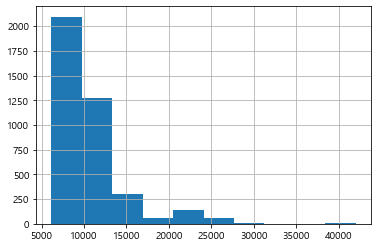

In [63]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 
# 그리고 price라는 변수에 담기
# .loc[행]
# .loc[행, 열]

# 수치 데이터를 카테고리로 바꾸는 작업을 비닝 혹은 버케팅이라고 함
h = df_last["평당분양가격"].hist(bins = 10)

In [64]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 
# 그리고 price라는 변수에 담기
# .loc[행]
# .loc[행, 열]

# 이 데이터에서 평당분양가격만 가져온다.
price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]

<AxesSubplot:xlabel='평당분양가격'>

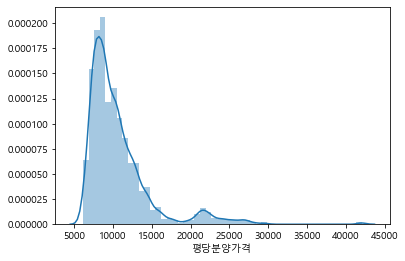

In [65]:
# distplot으로 평당분양가격을 표현해 봅니다.

sns.distplot(price)

# distplot 
# - kde라는 특성이 있는데, 가우시안 분포에 따라 그림 (정규분포)
# - 부드러운 곡선의 면적이 1이 되는 값이 왼쪽에 있는 값이다(y)

<AxesSubplot:xlabel='평당분양가격'>

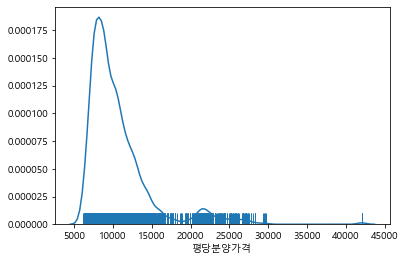

In [66]:
# distplot에서 곡선만 보고 싶을때
sns.distplot(price, hist = False, rug = True)

<AxesSubplot:>

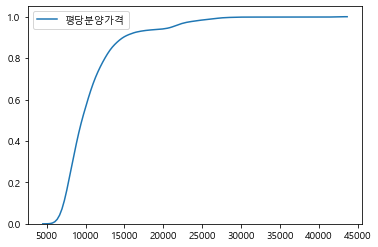

In [67]:
# cumulative = 누적 곡선
sns.kdeplot(price, cumulative=True)

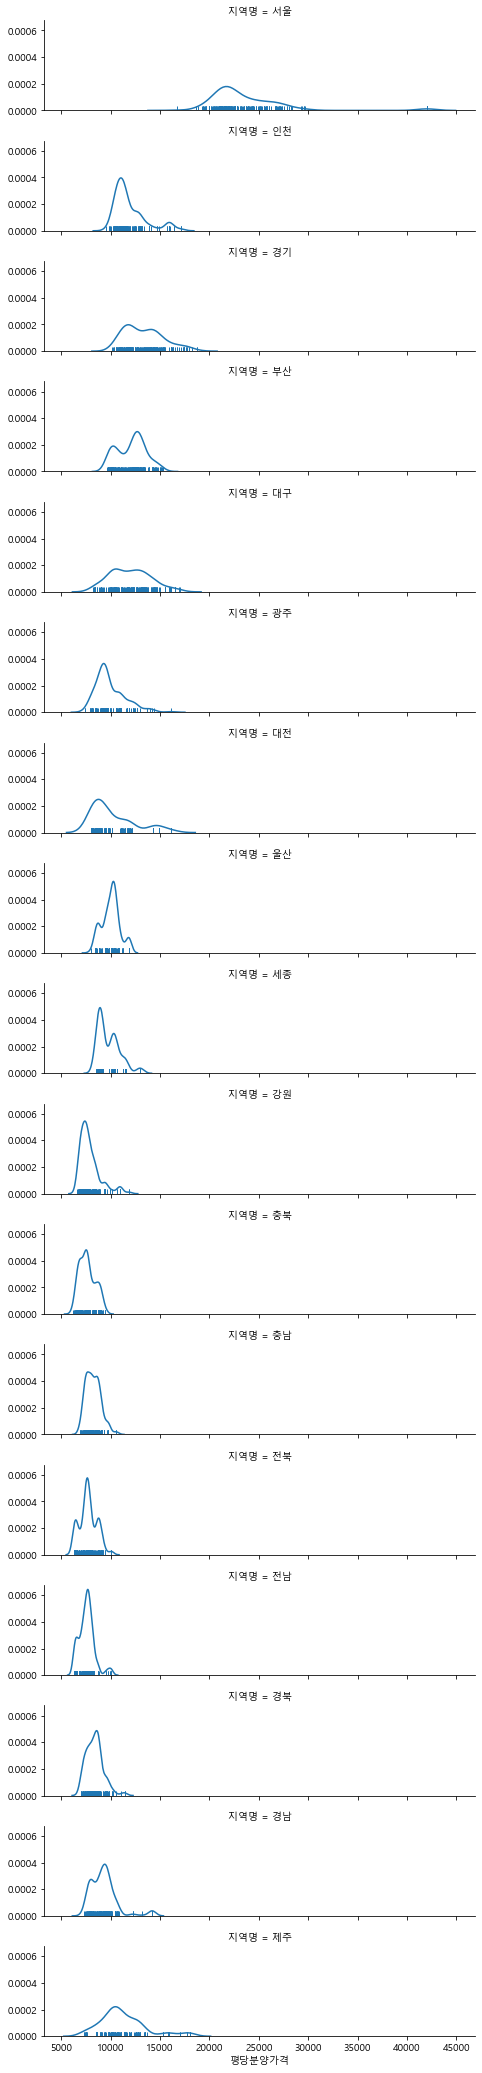

In [68]:
# subplot 으로 표현해 봅니다

g = sns.FacetGrid(df_last, row="지역명", 
                 height = 1.7, aspect = 4)
g.map(sns.distplot, "평당분양가격", hist = False, rug=True)

###### 산마루의 Ridgeplot
지역별로 분양가격의 분포, 서울을 기준으로 가운데에 분포되어 있는데 이상치가 있음. 이상치가 있어서 지방 도시 같은 경우에는 왼쪽으로 치우쳐져 있따.
서울에서 지방으로 갈수록 낮은 가격의 분양가격이 분포가 보인다.

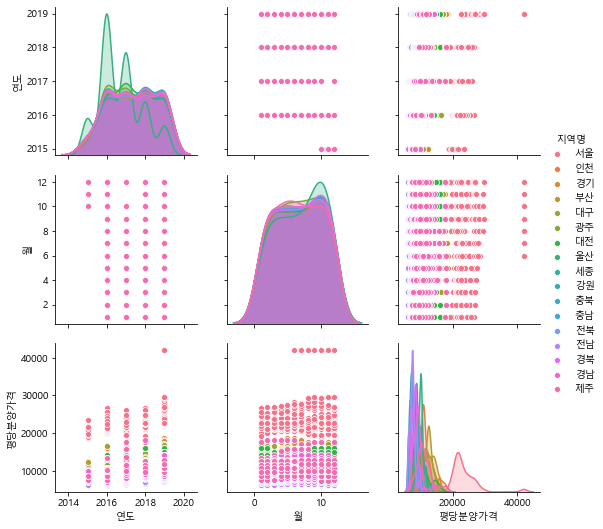

In [69]:
# pairplot 
# 행과 열을 같이 가져오려면 loc를 써줘야함.
df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(), 
                          ["연도", "월","평당분양가격","지역명","전용면적"]]
sns.pairplot(df_last_notnull, hue = "지역명")

In [70]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계
# value_counts()는 기본적으로 결측치를 제외하고 값을 계산합니다.

df_last["전용면적"].value_counts()

60㎡~85㎡     867
전체          867
85㎡~102㎡    867
60㎡         867
102㎡~       867
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기

In [71]:
# 컬럼이 ... 되어있을 때 다 보기 위한 방법
pd.options.display.max_columns = 25 # 최고 칼럼수

In [72]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [73]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [74]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.

df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
지역          17 non-null object
2013년12월    17 non-null int64
2014년1월     17 non-null int64
2014년2월     17 non-null int64
2014년3월     17 non-null int64
2014년4월     17 non-null int64
2014년5월     17 non-null int64
2014년6월     17 non-null int64
2014년7월     17 non-null int64
2014년8월     17 non-null int64
2014년9월     17 non-null int64
2014년10월    17 non-null int64
2014년11월    17 non-null int64
2014년12월    17 non-null int64
2015년1월     17 non-null int64
2015년2월     17 non-null int64
2015년3월     17 non-null int64
2015년4월     17 non-null int64
2015년5월     17 non-null int64
2015년6월     17 non-null int64
2015년7월     17 non-null int64
2015년8월     17 non-null int64
dtypes: int64(21), object(1)
memory usage: 3.0+ KB


In [75]:
# 결측치 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 Tidy data 만들기

- pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있음. 
- df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다르다. 
- 같은 형태로 만들어주어야 데이터를 합칠 수 있음
- 데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봄

In [76]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [77]:
# pd.melt를 사용하며, 녹인 데이터는 df_first_melt 변수에 담음

df_first_melt = df_first.melt(id_vars="지역", var_name= "기간", value_name= "평당분양가격")
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [78]:
# df_first_melt 변수에 담겨진 칼럼의 이름을
# ["지역명", "기간", "평당분양가격"으로 변경합니다.]

df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


In [79]:
# 특정 컬럼 지목해서 컬럼명 변경
df_first_melt.rename(columns = {"지역명" : "지역명"})
df_first_melt

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


### 연도와 월을 분리하기

df_last의 컬럼들과 df_first의 컬럼들이 불일치해서 통일화

In [80]:
date = "2013년12월"
date

'2013년12월'

In [81]:
# split을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.
date.split("년")

['2013', '12월']

In [82]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.
date.split("년")[0]

'2013'

In [83]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.

date.split("년")[-1].replace("월","")

'12'

In [84]:
# parse_year라는 함수를 만듭니다.
# 연도만 변환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_year(date):
    year =  date.split("년")[0]
    year = int(year)
    return year

y = parse_year(date)
print(type(y))
y

<class 'int'>


2013

In [85]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.

parse_year(date)

2013

In [86]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다

def parse_month(date):
    month = date.split("년")[-1].replace("월", "")
    month = int(month)
    return month

parse_month(date)

12

In [87]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.
parse_month(date)

12

In [88]:
# df_first_melt 변수에 담긴 데이터프레임에서
# apply를 활용해 연도만 추출해서 새로운 칼럼에 담습니다.

df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013
3,인천,2013년12월,10204,2013
4,광주,2013년12월,6098,2013
...,...,...,...,...
352,전북,2015년8월,6580,2015
353,전남,2015년8월,6289,2015
354,경북,2015년8월,7037,2015
355,경남,2015년8월,7665,2015


In [89]:
# df_first_melt 변수에 담긴 데이터프레임에서
# apply를 활용해  월만 추출해서 새로운 칼럼에 담습니다.

df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [90]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.

df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
361,대구,2016,2,3341.0,11025.3,60㎡


In [91]:
# df_last의 모든 컬럼을 쓰지 않아서 병합에 필요한 컬럼만 추출
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [92]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [93]:
# 최근 데이터가 담긴 df_last에는 전용면적이 있습니다.
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다

# copy()로 명시적으로 복사해주면 df_last_prepare의 값을 변경해도 df_last에 영향을 주지 않는다.
df_last_prepare = df_last.loc[df_last["전용면적"] == "전체", cols].copy()
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [94]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 컬럼에 담습니다.

df_first_prepare = df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


### concat으로 데이터 합치기
- 두 개의 데이터프레임을 합칠 때 사용

In [95]:
# df_first_prepare와 df_last_preapre를 합쳐줌

df =pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1224, 4)

In [96]:
# 제대로 합쳐졌는지 미리보기
df.tail()

,지역명,연도,월,평당분양가격
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9
4330,제주,2019,12,12810.6


In [97]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.

# sort = False - 오름차순
df["연도"].value_counts(sort = False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### pivot_table 사용하기
- melt로 녹여준 데이터를 다시 컬럼으로 만드는 것

In [98]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그림
# pivot은 연산을 하지 않고 데이터 형태만 바꿔주는 것
# pivot_table은 연산도 하고 데이터 형태도 바꾸는 것

t = pd.pivot_table(df, index="연도", columns="지역명", values = "평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

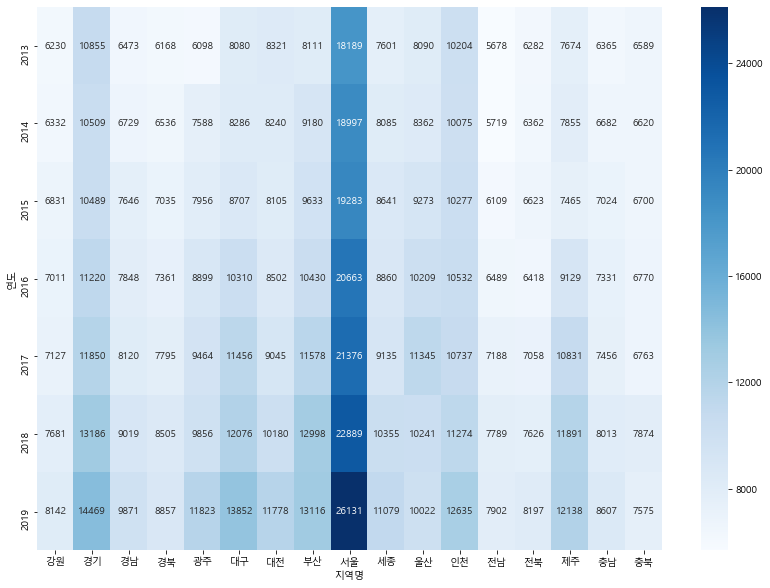

In [99]:
# 위에서 그린 피봇테이블을 히트맵으로 표현
plt.figure(figsize = (14,10))

# cmap = 한 가지 색상 , annot = True - 값도 같이 표시
sns.heatmap(t, cmap = "Blues", annot = True,fmt=".0f")

서울의 평당분양가격이 월등히 높다

In [100]:
# transpose를 사용하면 행과 열을 바꿔줄 수 있음

t.transpose()

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

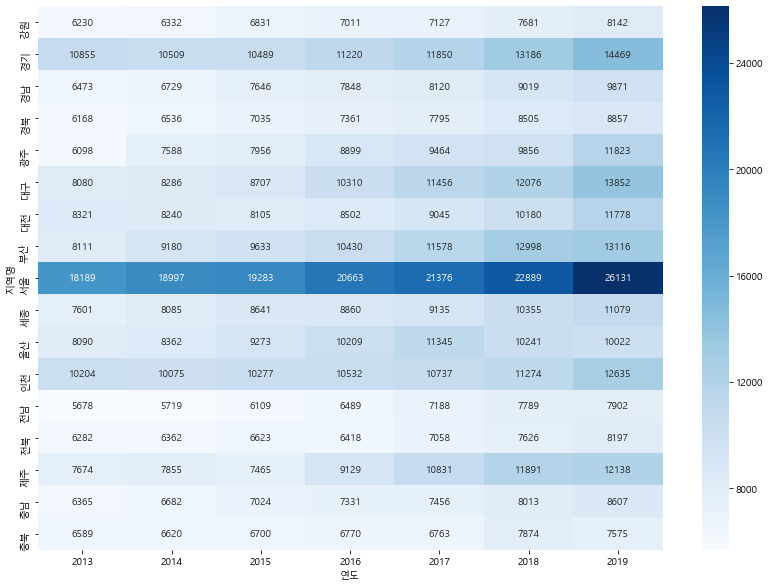

In [101]:
# 바뀐 행과 열을 히트맵으로 표현

plt.figure(figsize = (14,10))

# cmap = 한 가지 색상 , annot = True - 값도 같이 표시
sns.heatmap(t.T, cmap = "Blues", annot = True,fmt=".0f")

In [102]:
! pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in c:\users\rlatj\anaconda3\lib\site-packages (3.3.4)


In [103]:
# 다른 형태의 피봇테이블도 그려봅니다. 인덱스에 ["연도", "지역명"]
# 을 넣고 그림

In [104]:
# Groupby로 그려봅니다. 인덱스에 ["연도","지역명"] 을 넣고 그려보기
# unstack - 멀티인덱스의 마지막 인덱스 값을 컬럼으로 만들어줌

g = df.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

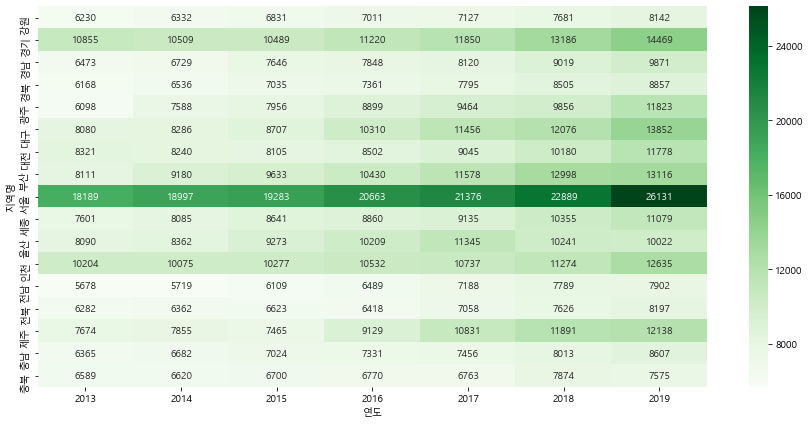

In [105]:
plt.figure(figsize = (15,7))
sns.heatmap(g.T, annot = True, fmt = ".0f", cmap = "Greens")

## 2013년부터 최근 데이터까지 시각화하기

### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

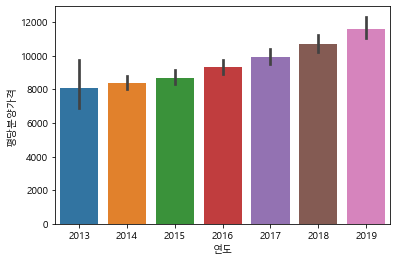

In [108]:
# barplot 으로 연도별 평당분양가격 그리기
# barplot estimator가 mean이여서 y축은 평균값을 의미한다.
# 검은색 막대는 ci = 95, 신뢰구간 95%를 의미한다.
sns.barplot(data=df, x="연도", y="평당분양가격")

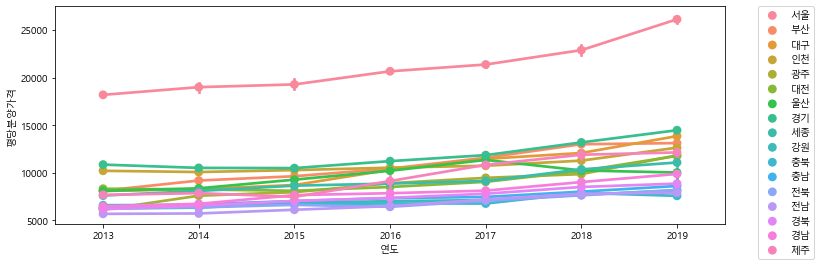

In [113]:
# pointplot 으로 연도별 평당분양가격 그리기
plt.figure(figsize = (12,4))
sns.pointplot(data = df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)


(72, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

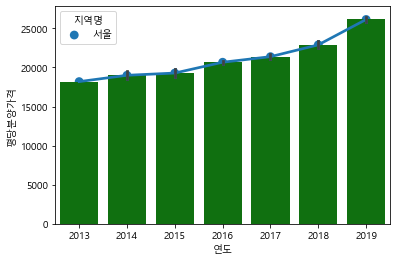

In [125]:
# 서울만 barplot으로 그리기
df_seoul = df[df["지역명"]=="서울"].copy()
print(df_seoul.shape)

g = sns.barplot(data=df_seoul, x="연도",y="평당분양가격",color="g")
# barplot에 pointplot을 같이 그리기 가능
sns.pointplot(data = df_seoul, x="연도", y="평당분양가격", hue="지역명")


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

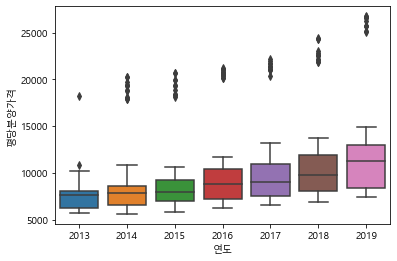

In [126]:
# 연도별 평당분양가격 boxplot 그리기
sns.boxplot(data=df, x="연도",y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

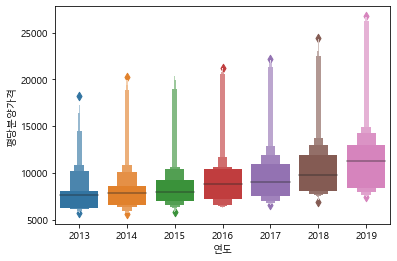

In [127]:
sns.boxenplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

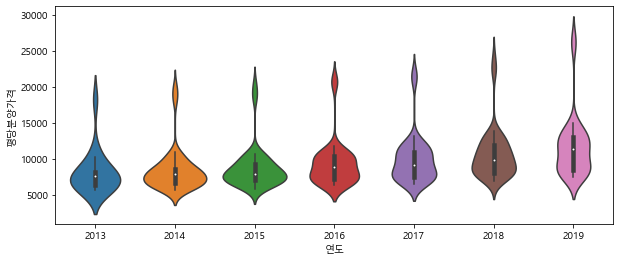

In [133]:
# 연도별 평당분양가격 violinplot 그리기
plt.figure(figsize=(10,4))
sns.violinplot(data=df, x="연도", y="평당분양가격")

바이올린안에 검은색이 박스플롯, 하얀색 점이 중앙값

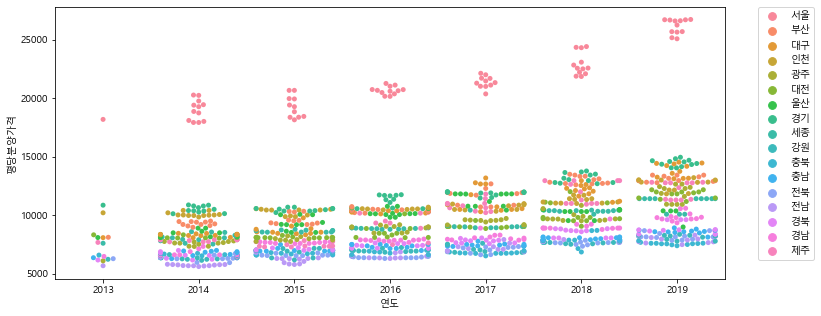

In [144]:
# 연도별 평당분양가격 swarmplot 그리기
plt.figure(figsize=(12,5))
sns.swarmplot(data=df,x="연도",y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)


- 서울의 평당분양가격이 다른 지역보다 이상치처럼 보일 정도로 높은 편이다.
- 2013년은 데이터가 적음

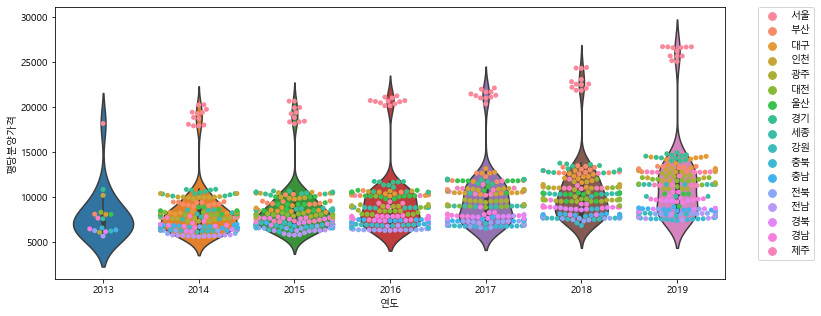

In [147]:
# swarm과 violin 플롯을 동시에 그릴 수 있음

plt.figure(figsize=(12,5))
sns.violinplot(data=df,x="연도",y="평당분양가격")
sns.swarmplot(data=df,x="연도",y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

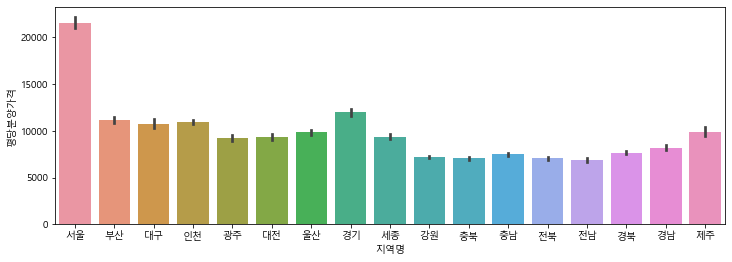

In [153]:
# barplot 으로 지역별 평당분양가격 그리기

plt.figure(figsize=(12,4))
sns.barplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

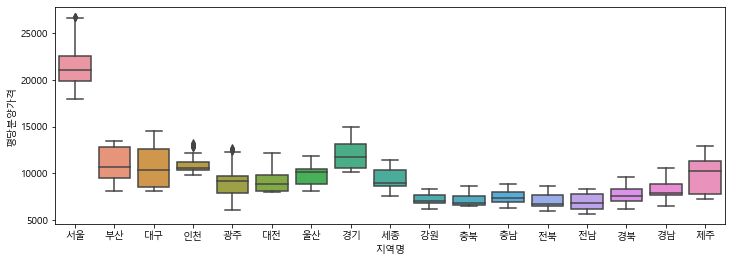

In [154]:
# boxplot 으로 지역별 평당분양가격 그리기
# seaborn의 장점 :  따로 계산을 안해도 멋진 그래프들을 쉽게 그릴 수 있다.

plt.figure(figsize=(12,4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

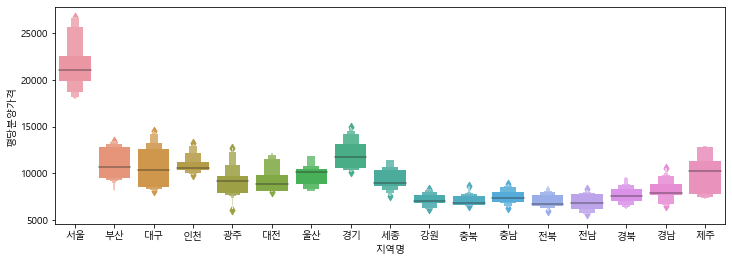

In [156]:
# boxenplot
# boxplot의 단점을 보완해서 박스 안에 데이터의 분포를 한 눈에 보기 쉬움

plt.figure(figsize=(12,4))
sns.boxenplot(data=df, x="지역명", y="평당분양가격")


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

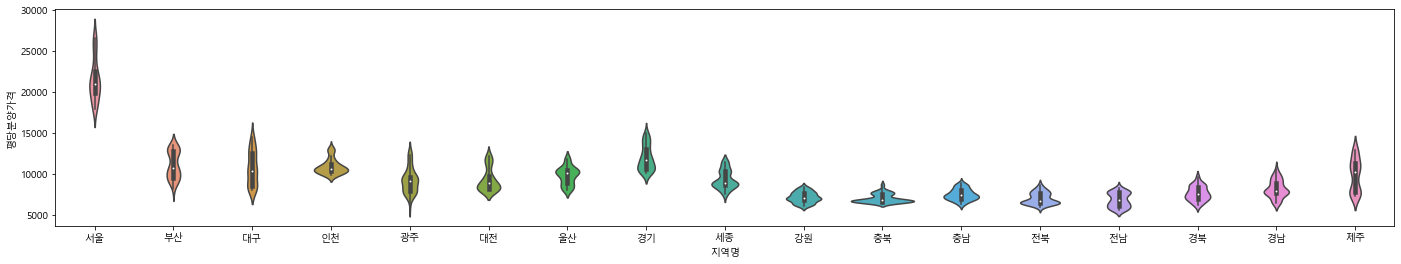

In [158]:
# violinplot 으로 지역별 평당분양가격 그리기
plt.figure(figsize=(24,4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

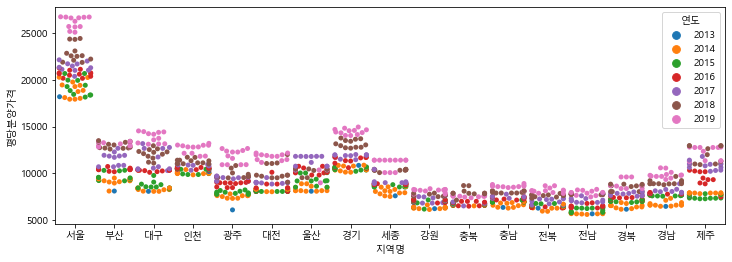

In [160]:
# swarmplot 으로 지역별 평당분양가격 그리기

plt.figure(figsize=(12,4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")

13년부터 19년까지 분양가격이 계속 상승하고 있다